In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import mglearn
#import os
import pickle

#os.environ['KMP_DUPLICATE_LIB_OK']='True'

#regression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
#from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR


#model selection
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, MinMaxScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

#evaluation metrics
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score,mean_absolute_error

### A SHORT DESCRIPTION OF THE FEATURES.

datetime - hourly date + timestamp

season - 1 = spring, 2 = summer, 3 = fall, 4 = winter

holiday - whether the day is considered a holiday

workingday - whether the day is neither a weekend nor holiday

weather -

1: Clear, Few clouds, Partly cloudy, Partly cloudy

2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

temp - temperature in Celsius

atemp - "feels like" temperature in Celsius

humidity - relative humidity

windspeed - wind speed

casual - number of non-registered user rentals initiated

registered - number of registered user rentals initiated

count - number of total rentals

In [2]:
df = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
df.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
print(df.shape)
print(df_test.shape)

(10886, 12)
(6493, 9)


In [5]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [6]:
df.corr()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948


In [7]:
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

### visualize

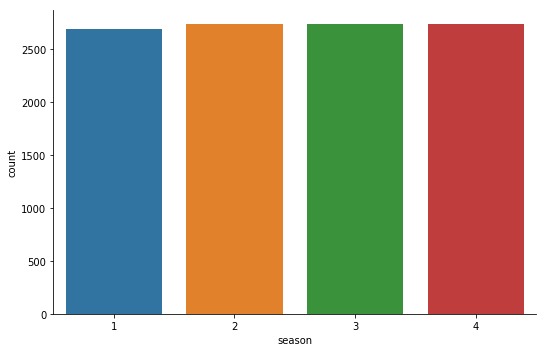

In [8]:
sns.factorplot(x='season',data=df,kind='count',size=5,aspect=1.5)

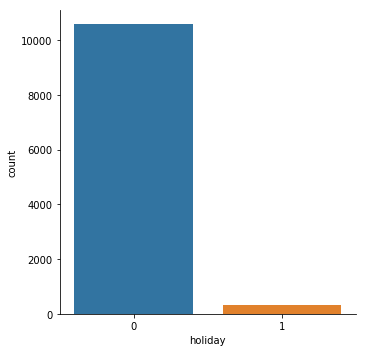

In [9]:
df.holiday.value_counts()
sns.factorplot(x='holiday',data=df,kind='count',size=5,aspect=1) # mayoritas peminjaman di non holiday

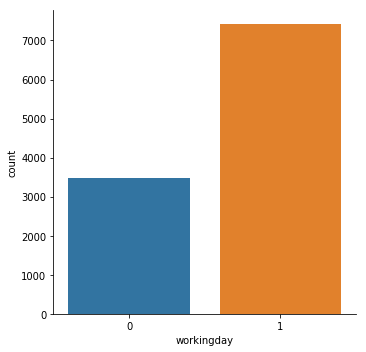

In [10]:
df.workingday.value_counts()
sns.factorplot(x='workingday',data=df,kind='count',size=5,aspect=1) # mayoritas peminjaman di workinday

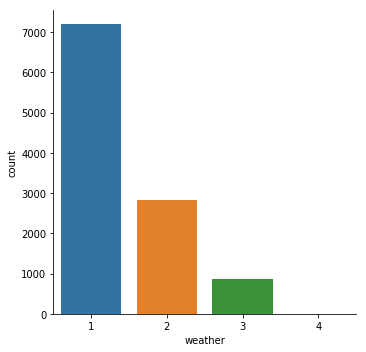

In [11]:
df.weather.value_counts()
sns.factorplot(x='weather', data=df, kind='count', size=5, aspect=1) #mayoritas peminjaman pada musim 1

#### variation variable

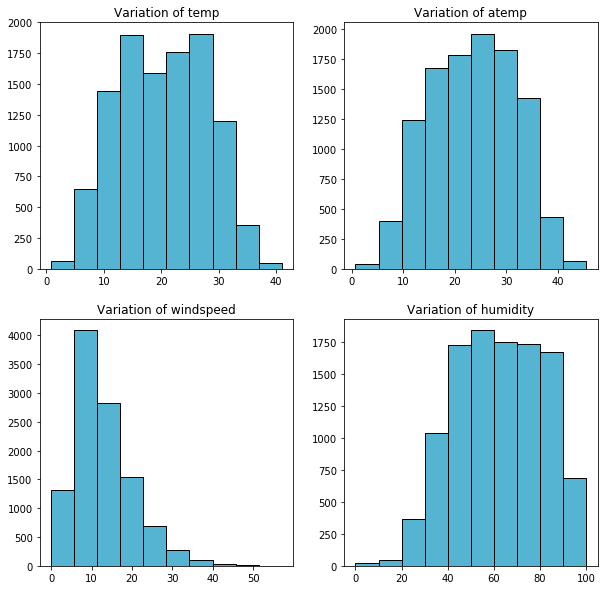

In [12]:
# can also be visulaized using histograms for all the continuous variables.
df.temp.unique()
fig,axes=plt.subplots(2,2)
axes[0,0].hist(x="temp",data=df,edgecolor="black",linewidth=1,color='#56B4D3')
axes[0,0].set_title("Variation of temp")
axes[0,1].hist(x="atemp",data=df,edgecolor="black",linewidth=1,color='#56B4D3')
axes[0,1].set_title("Variation of atemp")
axes[1,0].hist(x="windspeed",data=df,edgecolor="black",linewidth=1,color='#56B4D3')
axes[1,0].set_title("Variation of windspeed")
axes[1,1].hist(x="humidity",data=df,edgecolor="black",linewidth=1,color='#56B4D3')
axes[1,1].set_title("Variation of humidity")
fig.set_size_inches(10,10)

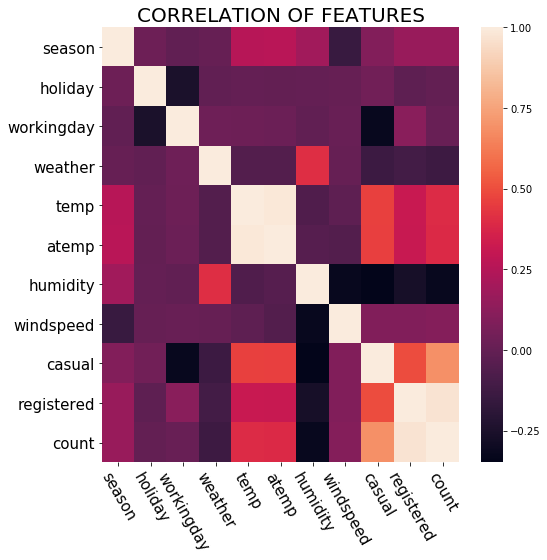

In [13]:
plt.figure(figsize=(8,8))
plt.title("CORRELATION OF FEATURES", fontsize=20)
sns.heatmap(df.corr())
plt.xticks(rotation=(-60), fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [14]:
### one-hot-encoding dummy variable
season=pd.get_dummies(df['season'],prefix='season')
df=pd.concat([df,season],axis=1)
season=pd.get_dummies(df_test['season'],prefix='season')
df_test=pd.concat([df_test,season],axis=1)
#df_test.head()

In [15]:
weather=pd.get_dummies(df['weather'],prefix='weather')
df=pd.concat([df,weather],axis=1)
weather=pd.get_dummies(df_test['weather'],prefix='weather')
df_test=pd.concat([df_test,weather],axis=1)
#df_test.head()

In [16]:
df.drop(['season','weather'],inplace=True,axis=1)
df_test.drop(['season','weather'],inplace=True,axis=1)
#df.drop(df.columns[[1,4]], axis=1, inplace=True)
#df_test.drop(df.columns[[1,4]], axis=1, inplace=True)
#df.drop('season', axis=1, inplace=True)

In [17]:
df["hour"] = [t.hour for t in pd.DatetimeIndex(df.datetime)]
df["dow"] = [t.dayofweek for t in pd.DatetimeIndex(df.datetime)]
df['week'] = [t.week for t in pd.DatetimeIndex(df.datetime)]
df["month"] = [t.month for t in pd.DatetimeIndex(df.datetime)]
df['year'] = [t.year for t in pd.DatetimeIndex(df.datetime)]
df['day'] = [t.day for t in pd.DatetimeIndex(df.datetime)]

In [18]:
df_test["hour"] = [t.hour for t in pd.DatetimeIndex(df_test.datetime)]
df_test["dow"] = [t.dayofweek for t in pd.DatetimeIndex(df_test.datetime)]
df_test['week'] = [t.week for t in pd.DatetimeIndex(df_test.datetime)]
df_test["month"] = [t.month for t in pd.DatetimeIndex(df_test.datetime)]
df_test['year'] = [t.year for t in pd.DatetimeIndex(df_test.datetime)]
df_test['day'] = [t.day for t in pd.DatetimeIndex(df_test.datetime)]

In [19]:
df.drop('datetime',axis=1,inplace=True)

In [20]:
df.drop(['casual','registered'],axis=1,inplace=True)

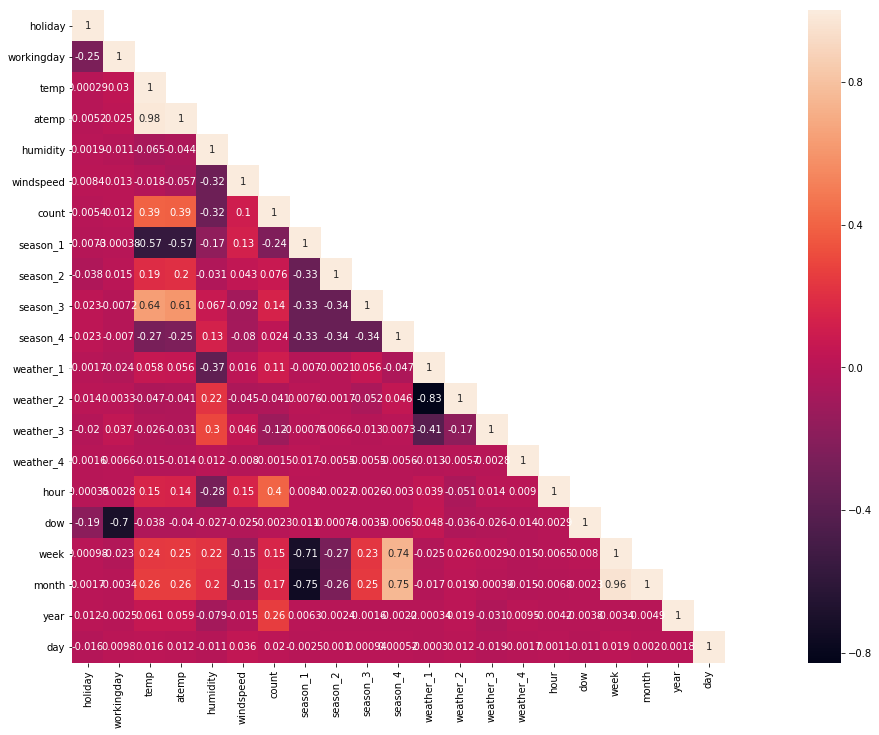

In [21]:
cor_mat= df[:].corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(30,12)
sns.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cbar=True)

### visualize 

/Users/adamwidibagaskarta/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


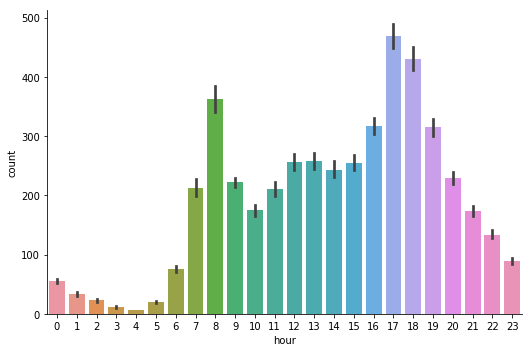

In [22]:
sns.factorplot(x="hour",y="count",data=df,kind='bar',size=5,aspect=1.5) #banyak pengguna pada setiap jamnya

/Users/adamwidibagaskarta/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


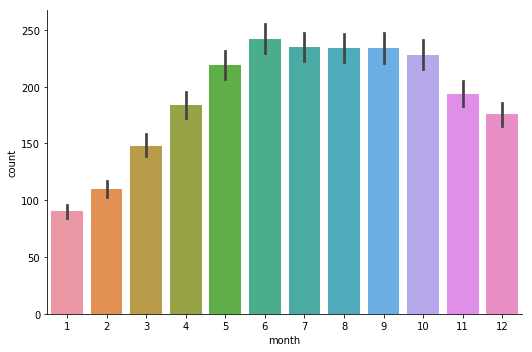

In [23]:
sns.factorplot(x="month",y="count",data=df,kind='bar',size=5,aspect=1.5) #banyak pengguna pada setiap bulannya

/Users/adamwidibagaskarta/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


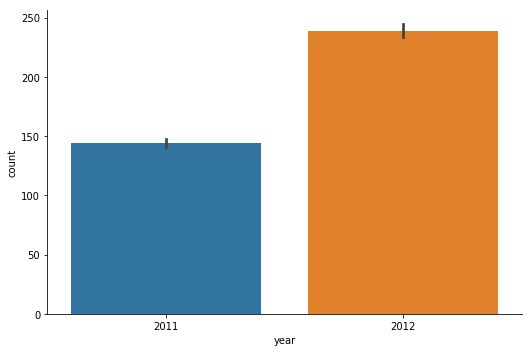

In [24]:
sns.factorplot(x="year",y="count",data=df,kind='bar',size=5,aspect=1.5)

/Users/adamwidibagaskarta/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


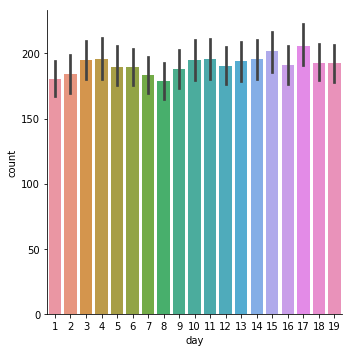

In [25]:
sns.factorplot(x="day",y='count',kind='bar',data=df,size=5,aspect=1) #banyak pengguna di setiap harinya

In [26]:
X = df.loc[:, df.columns != 'count']
y = np.log(df['count'])
#y = df['count']

In [27]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [28]:
print('X_train.shape {}'.format(X_train.shape))
print('X_test.shape {}'.format(X_test.shape))
print('y_train.shape {}'.format(y_train.shape))
print('y_test.shape {}'.format(y_test.shape))

X_train.shape (8708, 20)
X_test.shape (2178, 20)
y_train.shape (8708,)
y_test.shape (2178,)


## Linear Regression Process

In [29]:
lr = LinearRegression().fit(X_train,y_train)

In [30]:
print("lr.coef_ (w) : {}".format(lr.coef_)) 
print("lr.intercept_ (b) : {}".format(lr.intercept_))

#intercept selalu 1 nilai float number
#coef (w) merupakan Numpay array input untuk masing-masing fitur

lr.coef_ (w) : [ 0.08151366  0.01088705  0.04004724  0.01785184 -0.0136739   0.00440122
  0.10531765  0.07003055 -0.25729386  0.08194566 -0.25084246 -0.11157261
 -0.51654979  0.87896486  0.10179651  0.03125339 -0.00806547  0.10381491
  0.41634168  0.00304034]
lr.intercept_ (b) : -834.9038868152347


In [31]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train))) 
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

#underfitting

Training set score: 0.49
Test set score: 0.50


In [32]:
print('RMSLE :', np.sqrt(mean_squared_log_error(y_train,lr.predict(X_train))))

RMSLE : 0.267384563351856


## Ridge Regression Process

In [33]:
param_grid = {'alpha': [0.001,0.01,0.1, 1, 10]}

In [34]:
grid_search = GridSearchCV(Ridge(), param_grid, cv=5)

In [35]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [36]:
print(grid_search.score(X_test,y_test))

#general score

0.49524024444294173


Using the score method (or evaluating the output of the predict method) employs a model trained on the whole train‐ ing set. The best_score_ attribute stores the mean cross-validation accuracy, with cross-validation performed on the training set.

In [37]:
grid_search.best_params_

{'alpha': 10}

In [38]:
print('RMSLE :', np.sqrt(mean_squared_log_error(y_train,grid_search.predict(X_train))))

RMSLE : 0.26740469544278717


## Lasso Regression Process

In [39]:
param_grid_LS = {'alpha': [0.001,0.01,0.1, 1, 10]}

In [40]:
grid_search_LS = GridSearchCV(Lasso(), param_grid_LS, cv=5)

In [41]:
grid_search_LS.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [42]:
grid_search_LS.best_params_

{'alpha': 0.001}

In [43]:
print(grid_search_LS.score(X_test,y_test))

0.4952977078231015


In [44]:
grid_search_LS.best_score_
#mean CV 

0.4883964234162693

In [45]:
print('RMSLE :', np.sqrt(mean_squared_log_error(y_train,grid_search_LS.predict(X_train))))

RMSLE : 0.26744895464819113


Text(0, 0.5, 'Coefficient magnitude')

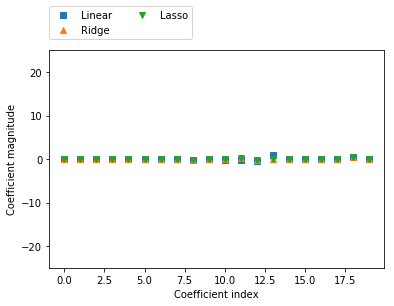

In [46]:
plt.plot(lr.coef_, 's', label="Linear")
plt.plot(grid_search.best_estimator_.coef_, '^', label="Ridge")
plt.plot(grid_search_LS.best_estimator_.coef_, 'v', label="Lasso")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

## SVR Regression Process

In [47]:
param_grid_SVR = [{'kernel': ['rbf'],
                   'C': [0.1, 1, 10],
                   'gamma': [0.1, 1, 10]},
                  {'kernel': ['linear'],
                   'C': [0.1, 1, 10]}]

In [48]:
grid_search_SVR = GridSearchCV(SVR(), param_grid_SVR, cv=5) 

In [49]:
grid_search_SVR.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'kernel': ['rbf'], 'C': [0.1, 1, 10], 'gamma': [0.1, 1, 10]}, {'kernel': ['linear'], 'C': [0.1, 1, 10]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [50]:
print("Best parameters: {}".format(grid_search_SVR.best_params_))
print("Best cross-validation score (mean): {:.2f}".format(grid_search_SVR.best_score_))

Best parameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Best cross-validation score (mean): 0.41


In [51]:
print('RMSLE :', np.sqrt(mean_squared_log_error(y_train, grid_search_SVR.predict(X_train))))

ValueError: Mean Squared Logarithmic Error cannot be used when targets contain negative values.

In [52]:
pred = grid_search_SVR.predict(X_train)
print(pred[pred < 0])

[-0.10045362]


## Random Forest

In [53]:
param_forest = {'n_estimators': [10,20,30,40],
                   'max_depth': [3,5,10]}

In [54]:
grid_search_forest = GridSearchCV(RandomForestRegressor(random_state=0,max_features='log2'), 
                                  param_forest, cv=5)

In [55]:
grid_search_forest.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='log2', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [10, 20, 30, 40], 'max_depth': [3, 5, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [56]:
grid_search_forest.score(X_test,y_test)

0.8406298358024762

In [57]:
print("Best parameters: {}".format(grid_search_forest.best_params_))
print("Best cross-validation score (mean): {:.2f}".format(grid_search_forest.best_score_))

Best parameters: {'max_depth': 10, 'n_estimators': 30}
Best cross-validation score (mean): 0.84


In [58]:
print('RMSLE :', np.sqrt(mean_squared_log_error(y_train, grid_search_forest.predict(X_train))))

RMSLE : 0.14202414447907327


## Gradient Boosting

In [59]:
param_boost = {'n_estimators': [10,20,30],
               'max_depth': [3,5,10],
               'learning_rate': [0.01,0.1,1,10]}

In [60]:
grid_search_boost = GridSearchCV(GradientBoostingRegressor(random_state=0,max_features='log2'), 
                                 param_boost, cv=5)

In [61]:
grid_search_boost.fit(X_train,y_train)

/Users/adamwidibagaskarta/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3,
             max_features='log2', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_sam...       subsample=1.0, tol=0.0001, validation_fraction=0.1, verbose=0,
             warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [10, 20, 30], 'max_depth': [3, 5, 10], 'learning_rate': [0.01, 0.1, 1, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [62]:
grid_search_boost.score(X_test,y_test)

0.9063098595775075

In [63]:
print("Best parameters: {}".format(grid_search_boost.best_params_))
print("Best cross-validation score (mean): {:.2f}".format(grid_search_boost.best_score_))

Best parameters: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 30}
Best cross-validation score (mean): 0.90


In [64]:
print('RMSLE :', np.sqrt(mean_squared_log_error(y_train, grid_search_boost.predict(X_train))))

RMSLE : 0.0841719699209652


## Save Model 

untuk mencoba load model dari pickle dan menggunakannya untuk testing data

In [65]:
pickle.dump(grid_search_boost, open("model_gbr.pickle", "wb"))

## Predict Test Set

In [66]:
y_pred = np.exp(grid_search_boost.predict(df_test.drop('datetime',axis=1)))

In [67]:
y_pred

array([13.64007246,  7.6731728 ,  6.14144848, ..., 88.19139056,
       72.58235707, 56.35994184])

In [68]:
df_test['count'] = y_pred
df_test.to_csv('answer.csv')